## Лаб.09 Anomaly Detection

### Задача обнаружения аномалий на искусственной выборке

---

#### Входные данные: 
облако точек, несколько точек помечено как выбросы.

#### Задание:
Обнаружить эти точки тремя методами: изолирующий лес, эллипсоидальная аппроксимация (параметрическое восстановление плотности) и одноклассовый метод опорных векторов.

**Порядок выполнения работы:**
1. Сгенерируйте датасет в виде облака из 100 точек, 5 точек пометьте как выбросы:<br>`X = make_blobs(n_samples=100, n_features=2, centers=3, random_state=2, center_box=(-8.0, 8.0))[0]`<br>`X[:5,:] = 20*np.random.rand(5, 2) - 10`<br>`y = np.ones(100)`<br>`y[:5] = -1`
2. Выведите на диаграмме облако точек, пометив синим цветом основные точки, и красным – выбросы.
3. Создайте параметр outliers=0.1
4. Обучите методы обнаружения аномалий, рекомендуемые параметры:<br><b>svm.OneClassSVM</b><br>`nu=0.95 * outliers + 0.05, kernel="rbf", gamma=0.1`<br>`nu=0.95 * outliers + 0.05, kernel="poly", degree=3`<br><b>covariance.EllipticEnvelope</b><br>`contamination= outliers`<br><b>ensemble.IsolationForest</b><br>`contamination= outliers, random_state=1`<br>`max_features=1.0, bootstrap=False, n_jobs=1, random_state=None, verbose=0`
5. Для каждого метода выведите:
  * а) долю ошибок (процент точек с несовпадающими истинной и предсказанной метками).
  * б) облако точек на диаграмме, выделив точки с неправильно предсказанными метками черным цветом.

---

1. Сгенерируйте датасет в виде облака из 100 точек, 5 точек пометьте как выбросы:<br>`X = make_blobs(n_samples=100, n_features=2, centers=3, random_state=2, center_box=(-8.0, 8.0))[0]`<br>`X[:5,:] = 20*np.random.rand(5, 2) - 10`<br>`y = np.ones(100)`<br>`y[:5] = -1`

In [ ]:
# подключим необходимые библиотеки

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [ ]:
# generate a dataset in the form of a cloud of 100 points, mark 5 points as outliers

X = make_blobs(n_samples=100, n_features=2, centers=3, random_state=2, center_box=(-8.0, 8.0))[0]
X[:5, :] = 20 * np.random.rand(5, 2) - 10
y = np.ones(100)
y[:5] = -1

---

2. Выведите на диаграмме облако точек, пометив синим цветом основные точки, и красным – выбросы.

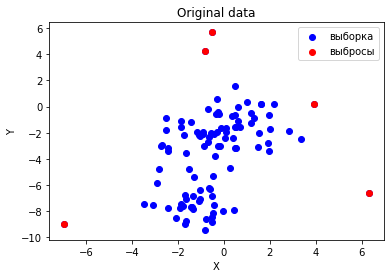

In [ ]:
# draw a point cloud on the diagram, marking the main points and outliers

plt.scatter(X[:, 0], X[:, 1], c="blue", label="выборка")
plt.scatter(X[:5,0], X[:5,1], c="red", label="выбросы")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original data')
plt.legend()
plt.show()

# we are generating random data and marking only 5 points as outliers

---

3. Создайте параметр outliers=0.1

In [ ]:
# create parameter outliers=0.1

outliers = 0.1

# the next models should be capable of detecting the same quantity of outliers that our real data has, 
# it means, only 5 outliers, that's why we compare their results with the real quantity of outliers

---

4. Обучите методы обнаружения аномалий, рекомендуемые параметры:<br><b>svm.OneClassSVM</b><br>`nu=0.95 * outliers + 0.05, kernel="rbf", gamma=0.1`<br>`nu=0.95 * outliers + 0.05, kernel="poly", degree=3`<br><b>covariance.EllipticEnvelope</b><br>`contamination=outliers`<br><b>ensemble.IsolationForest</b><br>`contamination=outliers, random_state=1, max_features=1.0, bootstrap=False, n_jobs=1, random_state=None, verbose=0`

In [ ]:
# train anomaly detection methods, recommended parameters:

# svm.OneClassSVM
one_class_svm_model = OneClassSVM(nu=0.95 * outliers + 0.05, kernel="sigmoid", gamma=0.1) # gamma is parameter only for rbf, poly and sigmoid kernel
second_one_class_svm_model = OneClassSVM(nu=0.95 * outliers + 0.05, kernel="poly", degree=3)

In [ ]:
# covariance.EllipticEnvelope
elliptic_envelope_model = EllipticEnvelope(contamination=outliers)

In [ ]:
# ensemble.IsolationForest

isolation_forest_model = IsolationForest(
    contamination=outliers,
    random_state=1,
    max_features=1.0,
    bootstrap=False,
    n_jobs=1,
    verbose=0
)

---

5. Для каждого метода выведите:
  * а) долю ошибок (процент точек с несовпадающими истинной и предсказанной метками).
  * б) облако точек на диаграмме, выделив точки с неправильно предсказанными метками черным цветом.


OneClassSVM
Error rate:  0.12


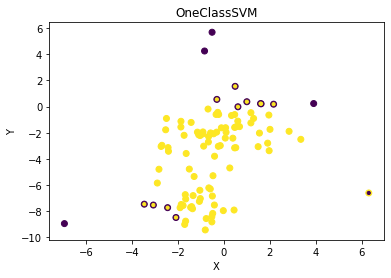

In [ ]:
# for each method print:
  # a) error rate (percentage of points with mismatched true and predicted labels)
  # b) a cloud of points on the diagram, highlighting points with incorrectly predicted labels in black

# svm.OneClassSVM
one_class_svm_model.fit(X)
y_pred = one_class_svm_model.predict(X)

print('\nOneClassSVM')
print('Error rate: ', np.mean(y_pred != y))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('OneClassSVM')
plt.show()


OneClassSVM 2
Error rate:  0.29


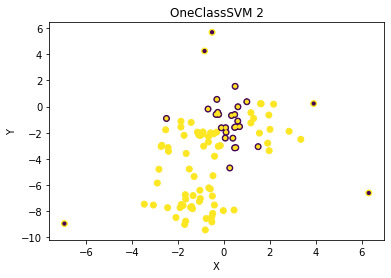

In [ ]:
# svm.OneClassSVM 2
second_one_class_svm_model.fit(X)
y_pred = second_one_class_svm_model.predict(X)

print('\nOneClassSVM 2')
print('Error rate: ', np.mean(y_pred != y))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('OneClassSVM 2')
plt.show()

# this is the worst model because the error rate is too high


EllipticEnvelope
Error rate:  0.05


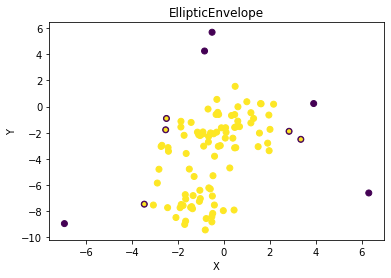

In [ ]:
# covariance.EllipticEnvelope
elliptic_envelope_model.fit(X)
y_pred = elliptic_envelope_model.predict(X)

print('\nEllipticEnvelope')
print('Error rate: ', np.mean(y_pred != y))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('EllipticEnvelope')
plt.show()


IsolationForest
Error rate:  0.05


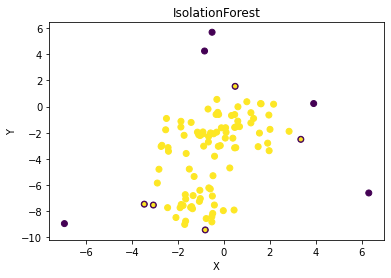

In [ ]:
# ensemble.IsolationForest
isolation_forest_model.fit(X)
y_pred = isolation_forest_model.predict(X)

print('\nIsolationForest')
print('Error rate: ', np.mean(y_pred != y))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('IsolationForest')
plt.show()

---

Experimentation

In [ ]:
# experimentation 1

one_class_svm_model = OneClassSVM(nu=0.95 * outliers + 0.05, kernel="sigmoid", gamma=0.1) # gamma is parameter only for rbf, poly and sigmoid

In [ ]:
one_class_svm_model.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'sigmoid',
 'max_iter': -1,
 'nu': 0.14500000000000002,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


OneClassSVM
Error rate:  0.12


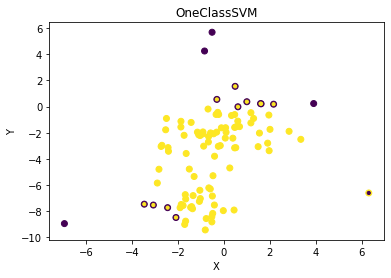

In [ ]:
one_class_svm_model.fit(X)
y_pred = one_class_svm_model.predict(X)

print('\nOneClassSVM')
print('Error rate: ', np.mean(y_pred != y))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('OneClassSVM')
plt.show()

In [ ]:
# experimentation 2

one_class_svm_model = OneClassSVM(nu=0.95 * outliers + 0.05, kernel="rbf", gamma=0.1) # gamma is parameter only for rbf, poly and sigmoid

In [ ]:
one_class_svm_model.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.14500000000000002,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


OneClassSVM
Error rate:  0.09


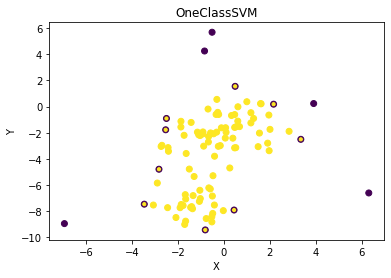

In [ ]:
one_class_svm_model.fit(X)
y_pred = one_class_svm_model.predict(X)

print('\nOneClassSVM')
print('Error rate: ', np.mean(y_pred != y))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('OneClassSVM')
plt.show()

In [ ]:
# experimentation 3

one_class_svm_model = OneClassSVM(nu=0.95 * outliers + 0.05, kernel="poly", gamma=0.1) # gamma is parameter only for rbf, poly and sigmoid

In [ ]:
one_class_svm_model.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'poly',
 'max_iter': -1,
 'nu': 0.14500000000000002,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


OneClassSVM
Error rate:  0.29


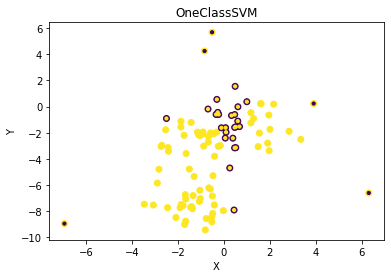

In [ ]:
one_class_svm_model.fit(X)
y_pred = one_class_svm_model.predict(X)

print('\nOneClassSVM')
print('Error rate: ', np.mean(y_pred != y))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('OneClassSVM')
plt.show()

In [ ]:
# experimentation 4

one_class_svm_model = OneClassSVM(nu=0.95 * outliers + 0.05, kernel="sigmoid", gamma="auto")

In [ ]:
one_class_svm_model.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'nu': 0.14500000000000002,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


OneClassSVM
Error rate:  0.12


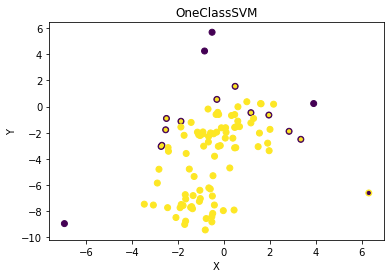

In [ ]:
one_class_svm_model.fit(X)
y_pred = one_class_svm_model.predict(X)

print('\nOneClassSVM')
print('Error rate: ', np.mean(y_pred != y))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('OneClassSVM')
plt.show()

In [ ]:
# experimentation 5

one_class_svm_model = OneClassSVM(nu=0.95 * outliers + 0.05, kernel="sigmoid", gamma="scale")

In [ ]:
one_class_svm_model.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'nu': 0.14500000000000002,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


OneClassSVM
Error rate:  0.11


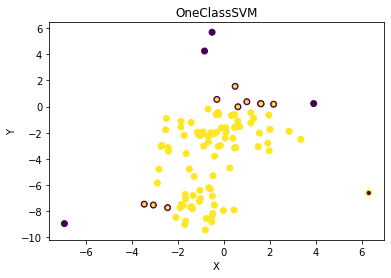

In [ ]:
one_class_svm_model.fit(X)
y_pred = one_class_svm_model.predict(X)

print('\nOneClassSVM')
print('Error rate: ', np.mean(y_pred != y))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('OneClassSVM')
plt.show()